# Проверочное задание. Операции с данными. Hockey

In [1]:
# Импортируй библиотеку pandas
import pandas as pd

In [2]:
# Библиотеки для построения диаграмм
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Загрузи таблицу с данными с веб-страницы по адресу
# https://www.espn.com/nhl/statistics/player/_/stat/points/year/2021/seasontype/3
# Обрати внимание на значение столбцов в примечаниях под таблицей на сайте
# Используй метод pd.read_html(). Он импортирует все таблицы с веб-страницы как список,
# из которого нужно сделать dataframe.
# Отобрази первые 5 строк dataframe.

hockey = pd.read_csv('/content/hockey.csv')
hockey.head(5)


,Unnamed: 0,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,PP-G,PP-A,SH-G,SH-A
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PP,PP,SH,SH
1,1,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,G,A,G,A
2,2,1,"Nikita Kucherov, RW",TB,23,8,24,32,6,14,1.39,62,12.9,0,4,15,0,0
3,3,2,"Brayden Point, C",TB,23,14,9,23,7,8,1.00,49,28.6,3,7,5,0,0
4,4,3,"Steven Stamkos, C",TB,23,8,10,18,0,4,0.78,43,18.6,2,5,7,0,0


In [9]:
# Переименуй столбцы, чтобы заголовки были как на сайте
# используй .columns = []
# список правильных меток столбцов -
col_names=['RK', 'PLAYER', 'TEAM', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'PTS/G', 'SOG', 'PCT', 'GWG', 'PP-G', 'PP-A', 'SH-G', 'SH-A']
hockey.columns = ['Num','RK', 'PLAYER', 'TEAM', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'PTS/G', 'SOG', 'PCT', 'GWG', 'PP-G', 'PP-A', 'SH-G', 'SH-A']
hockey.head()


,Num,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,PP-G,PP-A,SH-G,SH-A
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PP,PP,SH,SH
1,1,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,G,A,G,A
2,2,1,"Nikita Kucherov, RW",TB,23,8,24,32,6,14,1.39,62,12.9,0,4,15,0,0
3,3,2,"Brayden Point, C",TB,23,14,9,23,7,8,1.00,49,28.6,3,7,5,0,0
4,4,3,"Steven Stamkos, C",TB,23,8,10,18,0,4,0.78,43,18.6,2,5,7,0,0


In [12]:
# Удали все строки с NaN.
hockey.dropna(inplace=True)
hockey.head()

,Num,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,PP-G,PP-A,SH-G,SH-A
1,1,RK,PLAYER,TEAM,GP,G,A,PTS,+/-,PIM,PTS/G,SOG,PCT,GWG,G,A,G,A
2,2,1,"Nikita Kucherov, RW",TB,23,8,24,32,6,14,1.39,62,12.9,0,4,15,0,0
3,3,2,"Brayden Point, C",TB,23,14,9,23,7,8,1.00,49,28.6,3,7,5,0,0
4,4,3,"Steven Stamkos, C",TB,23,8,10,18,0,4,0.78,43,18.6,2,5,7,0,0
6,6,5,"Alex Killorn, LW",TB,19,8,9,17,-1,6,0.89,39,20.5,0,4,4,0,1


In [13]:
# Посмотри на весь фрейм целиком. Обрати внимание на "мусорные" строки.
print(hockey)

    Num  RK               PLAYER  TEAM  GP   G   A  PTS  +/-  PIM  PTS/G  SOG  \
1     1  RK               PLAYER  TEAM  GP   G   A  PTS  +/-  PIM  PTS/G  SOG   
2     2   1  Nikita Kucherov, RW    TB  23   8  24   32    6   14   1.39   62   
3     3   2     Brayden Point, C    TB  23  14   9   23    7    8   1.00   49   
4     4   3    Steven Stamkos, C    TB  23   8  10   18    0    4   0.78   43   
6     6   5     Alex Killorn, LW    TB  19   8   9   17   -1    6   0.89   39   
7     7   6       Nick Suzuki, C   MTL  22   7   9   16   -6    2   0.73   53   
9     9   8  Nathan MacKinnon, C   COL  10   8   7   15    6    2   1.50   38   
11   11  10     Mathew Barzal, C   NYI  19   6   8   14    0   19   0.74   44   
13   13  RK               PLAYER  TEAM  GP   G   A  PTS  +/-  PIM  PTS/G  SOG   
15   15  12       Josh Bailey, C   NYI  19   6   7   13   -2    4   0.68   34   
21   21  18     Brad Marchand, C   BOS  11   8   4   12    2   12   1.09   32   
25   25  RK               PL

In [16]:
# Придумай логическое условие, по которому можно выбрать все "мусорные" строки сразу.
# Исключи из фрейма все "мусорные" строки.
# Подсказка: исключить из датафрейма все строки где ['RK']=='RK'
hockey = hockey[hockey['RK'] != 'RK']
print(hockey)

    Num  RK               PLAYER TEAM  GP   G   A PTS +/- PIM PTS/G SOG   PCT  \
2     2   1  Nikita Kucherov, RW   TB  23   8  24  32   6  14  1.39  62  12.9   
3     3   2     Brayden Point, C   TB  23  14   9  23   7   8  1.00  49  28.6   
4     4   3    Steven Stamkos, C   TB  23   8  10  18   0   4  0.78  43  18.6   
6     6   5     Alex Killorn, LW   TB  19   8   9  17  -1   6  0.89  39  20.5   
7     7   6       Nick Suzuki, C  MTL  22   7   9  16  -6   2  0.73  53  13.2   
9     9   8  Nathan MacKinnon, C  COL  10   8   7  15   6   2  1.50  38  21.1   
11   11  10     Mathew Barzal, C  NYI  19   6   8  14   0  19  0.74  44  13.6   
15   15  12       Josh Bailey, C  NYI  19   6   7  13  -2   4  0.68  34  17.6   
21   21  18     Brad Marchand, C  BOS  11   8   4  12   2  12  1.09  32  25.0   
29   29  24    Sebastian Aho, RW  CAR  11   6   5  11   5  12  1.00  38  15.8   
33   33  28      Corey Perry, RW  MTL  22   4   6  10  -5  25  0.45  30  13.3   
41   41  34    Kyle Palmieri

In [17]:
# удали колонку 'RK'
hockey.drop("RK", axis=1, inplace=True)
print(hockey)

    Num               PLAYER TEAM  GP   G   A PTS +/- PIM PTS/G SOG   PCT GWG  \
2     2  Nikita Kucherov, RW   TB  23   8  24  32   6  14  1.39  62  12.9   0   
3     3     Brayden Point, C   TB  23  14   9  23   7   8  1.00  49  28.6   3   
4     4    Steven Stamkos, C   TB  23   8  10  18   0   4  0.78  43  18.6   2   
6     6     Alex Killorn, LW   TB  19   8   9  17  -1   6  0.89  39  20.5   0   
7     7       Nick Suzuki, C  MTL  22   7   9  16  -6   2  0.73  53  13.2   1   
9     9  Nathan MacKinnon, C  COL  10   8   7  15   6   2  1.50  38  21.1   2   
11   11     Mathew Barzal, C  NYI  19   6   8  14   0  19  0.74  44  13.6   1   
15   15       Josh Bailey, C  NYI  19   6   7  13  -2   4  0.68  34  17.6   1   
21   21     Brad Marchand, C  BOS  11   8   4  12   2  12  1.09  32  25.0   2   
29   29    Sebastian Aho, RW  CAR  11   6   5  11   5  12  1.00  38  15.8   2   
33   33      Corey Perry, RW  MTL  22   4   6  10  -5  25  0.45  30  13.3   1   
41   41    Kyle Palmieri, RW

In [21]:
# переиндексируй строки
hockey = hockey.reindex()
print(hockey)

    level_0  index  Num               PLAYER TEAM  GP   G   A PTS +/- PIM  \
0         0      2    2  Nikita Kucherov, RW   TB  23   8  24  32   6  14   
1         1      3    3     Brayden Point, C   TB  23  14   9  23   7   8   
2         2      4    4    Steven Stamkos, C   TB  23   8  10  18   0   4   
3         3      6    6     Alex Killorn, LW   TB  19   8   9  17  -1   6   
4         4      7    7       Nick Suzuki, C  MTL  22   7   9  16  -6   2   
5         5      9    9  Nathan MacKinnon, C  COL  10   8   7  15   6   2   
6         6     11   11     Mathew Barzal, C  NYI  19   6   8  14   0  19   
7         7     15   15       Josh Bailey, C  NYI  19   6   7  13  -2   4   
8         8     21   21     Brad Marchand, C  BOS  11   8   4  12   2  12   
9         9     29   29    Sebastian Aho, RW  CAR  11   6   5  11   5  12   
10       10     33   33      Corey Perry, RW  MTL  22   4   6  10  -5  25   
11       11     41   41    Kyle Palmieri, RW  NYI  19   7   2   9   5  10   

In [40]:
# Сконвертируй признак 'TEAM' в категориальный тип, остальные - в числовые типы (целые и с плавающей запятой)
# Исправь типы данных. Проверь результат
hockey['TEAM'] = hockey['TEAM'].astype('category')
hockey['GP'] = hockey['GP'].astype('int')
hockey['G'] = hockey['G'].astype('int')
hockey['A'] = hockey['A'].astype('int')
hockey['PTS'] = hockey['PTS'].astype('int')
hockey['+/-'] = hockey['+/-'].astype('int')
hockey['PIM'] = hockey['PIM'].astype('int')
hockey['PTS/G'] = hockey['PTS/G'].astype('float')
hockey['SOG'] = hockey['SOG'].astype('int')
hockey['PCT'] = hockey['PCT'].astype('float')
hockey['GWG'] = hockey['GWG'].astype('int')
hockey['PP-G'] = hockey['PP-G'].astype('int')
hockey['PP-A'] = hockey['PP-A'].astype('int')
hockey['SH-G'] = hockey['SH-G'].astype('int')
hockey['SH-A'] = hockey['SH-A'].astype('int')
print(hockey.dtypes)
print(hockey)

level_0       int64
index         int64
Num           int64
PLAYER       object
TEAM       category
GP            int64
G             int64
A             int64
PTS           int64
+/-           int64
PIM           int64
PTS/G       float64
SOG           int64
PCT         float64
GWG           int64
PP-G          int64
PP-A          int64
SH-G          int64
SH-A          int64
dtype: object
    level_0  index  Num               PLAYER TEAM  GP   G   A  PTS  +/-  PIM  \
0         0      2    2  Nikita Kucherov, RW   TB  23   8  24   32    6   14   
1         1      3    3     Brayden Point, C   TB  23  14   9   23    7    8   
2         2      4    4    Steven Stamkos, C   TB  23   8  10   18    0    4   
3         3      6    6     Alex Killorn, LW   TB  19   8   9   17   -1    6   
4         4      7    7       Nick Suzuki, C  MTL  22   7   9   16   -6    2   
5         5      9    9  Nathan MacKinnon, C  COL  10   8   7   15    6    2   
6         6     11   11     Mathew Barzal, C  

In [42]:
# Сколько уникальных значений GP в датасете? Выведи результат командой print()
print(hockey['GP'].unique())

[23 19 22 10 11]


In [50]:
# Какое число получается, если сложить значения GP, имеющие индексы 9 и 11? 30
# Выведи результат командой print()
sum = hockey.loc[9, 'GP'] + hockey.loc[11, 'GP']
print(sum)

30


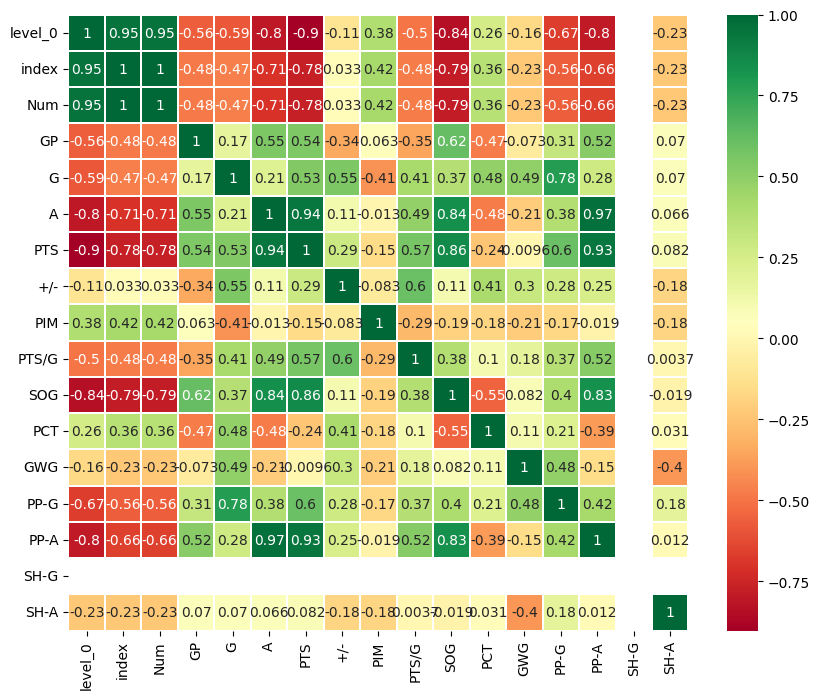

In [52]:
#	Визуализируй корреляционную матрицу. Используй sns.heatmap().
# Между какими переменными максимальная положительная корреляция?
corr = hockey.corr(numeric_only=True)
sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

###